In [1]:
import sys
sys.path.append('../../pyutils')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import metrics
import utils

# Bernoulli Distribution

$$X \sim B(p)$$

$X$ is a single binary random variable.

Parameters:
- $p \in [0, 1]$: probability that X takes the value $1$

$$P(X=0) = 1-p$$
$$P(X=1) = p$$
$$P(X=x) = p^x(1-p)^{1-x}$$
$$\mathbb{E}[X] = p$$
$$\text{Var}(x) = p(1 - p)$$

In [2]:
N = 1000000
p = 0.4
x = (np.random.rand(N) < p).astype(np.int)
    
print('E[X]:', np.mean(x))
print('Var[X]:', np.var(x), p * (1-p))

E[X]: 0.399961
Var[X]: 0.2399921984789999 0.24


# Binomial distribution

$$X \sim B(n, p)$$

$X$ is a single discrete value, corresponding to the number of successes when repeating $n$ independant Binomial experiments.

Parameters:
- $n$: number of trials
- $p \in [0, 1]$: success probability for each trial.

$p(X = k)$: $k$: number of successes.

$$\text{PMF: } f(k) = \binom{n}{k} p^k(1-p)^{n-k}$$
$$\mathbb{E}[X] = np$$
$$\text{Var}(X) = np(1 - p)$$

$$\binom{n}{k} = \frac{n!}{k!(n-k)!}$$

In [3]:
def rand_binomial(n, p):
    data = (np.random.rand(n) < p).astype(np.int)
    return np.sum(data)

N = 1000000
n = 7
p = 0.4
x = np.array([rand_binomial(n,p) for _ in range(N)])
    
print('E[X]:', np.mean(x), n*p)
print('Var[X]:', np.var(x), n*p * (1-p))

E[X]: 2.798516 2.8000000000000003
Var[X]: 1.6795441977440004 1.6800000000000002


# Multinoulli (Categorical) Distribution

$X$ is a single discrete random variable with $k$ different states.

Parameters:
- $p_i$: probability that $x$ takes the value $i$: $\sum p_i = 1$, $p_i >= 0$

$$p(X=i) = p_i$$

# Multinomial distribution

$X$ is a discrete vector of size $k$, corresponding to the number of times each states it obtained when repeating $n$ independant Multinoulli experiments.

Parameters:
- $n$: number of trials
- $p_i$: probability of event $i$: $\sum p_i = 1$, $p_i >= 0$

$X$ discrete vector of size $K$: $X_i$: number of realisations of the event $i$.

$$\text{PMF: } f(x) = \binom{n}{x_1\text{...} x_k} \prod_{i=1}^K p_i^{x_i}$$

$$\mathbb{E}[X_i] = np_i$$
$$\text{Var}(X_i) = np_i(1 - p_i)$$
$$\text{Cov}(X_i, X_j) = -np_ip_j \space (i \neq j)$$

$$\binom{n}{k_1 \text{...} k_m}= \frac{n!}{\prod_{i=1}^m k_i!}$$

In [4]:
def rand_multinomial(p):
    s = 0
    p2 = np.empty(len(p))
    for i in range(len(p)-1):
        s += p[i]
        p2[i] = s
    p2[-1] = 1
    
    u = np.random.rand()
    k = 0
    while u > p2[k]:
        k += 1
    return k

N = 1000000
x = np.empty(N).astype(np.int)
p = [0.1, 0.6, 0.3]
for i in range(N):
    x[i] = rand_multinomial(p)
    
print('p[0]:', np.mean(x==0))
print('p[1]:', np.mean(x==1))
print('p[2]:', np.mean(x==2))

p[0]: 0.100429
p[1]: 0.600095
p[2]: 0.299476


# Normal (Gaussian) distribution

$$X \sim \mathcal{N}(\mu, \sigma^2)$$
Parameters:
- $\mu$: mean
- $\sigma^2 \geq 0$: variance


$$\text{PDF: } f(x) = \frac{1}{\sqrt{2\pi \sigma^2}} \text{exp}(-\frac{(x - \mu)^2}{2\sigma^2})$$

$$\text{CDF: } F(x) = \frac{1}{2}[1 + \text{erf}(\frac{x - \mu}{\sigma \sqrt{2}})]$$
$$\mathbb{E}[X] = \mu$$
$$\text{Var}(X) = \sigma^2$$

$$ \text{erf}(x) = \frac{1}{\sqrt{\pi}} \int_{-x}^{x} e^{-t^2}dt$$

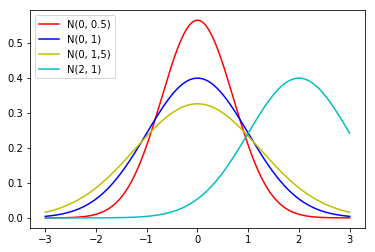

In [20]:
def normal_pdf(mu, v, x):
    den = np.sqrt(2 * np.pi * v)
    num = - (x - mu)**2 / (2*v)
    return np.exp(num) / den

x = np.linspace(-3, 3, 1000)

plt.plot(x, normal_pdf(0, 0.5, x), c='r', label='N(0, 0.5)')
plt.plot(x, normal_pdf(0, 1, x), c='b', label='N(0, 1)')
plt.plot(x, normal_pdf(0, 1.5, x), c='y', label='N(0, 1,5)')
plt.plot(x, normal_pdf(2, 1, x), c='c', label='N(2, 1)')
plt.legend()
plt.show()

In [8]:
_box_muller = [None]
def norm_box_muller():    
    if _box_muller[0] is not None:
        res = _box_muller[0]
        _box_muller[0] = None
        return res
    
    u1, u2 = np.random.rand(2)
    r = np.sqrt(-2*np.log(u1))
    theta = 2*np.pi*u2
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    _box_muller[0] = x
    return y

_marsagalia_polar = [None]
def norm_marsagalia_polar():
    if _marsagalia_polar[0] is not None:
        res = _marsagalia_polar[0]
        _marsagalia_polar[0] = None
        return res

    while True:
        x, y = 2 * np.random.rand(2) - 1
        s = x**2 + y**2
        if s < 1 and s>0:
            break
    
    f = np.sqrt((-2*np.log(s))/s)
    a, b = x*f, y*f
    _marsagalia_polar[0] = a
    return b
    
    

N = 1000000

print('mu =', -1.3)
print('std =', 4.5)

x = np.random.randn(N) * 4.5 - 1.3
print('[NP]  mu =', np.mean(x))
print('[NP] std =', np.std(x))


x = np.empty(N)
for i in range(N): x[i] = 4.5 * norm_box_muller() - 1.3
print('[BM]  mu =', np.mean(x))
print('[BM] std =', np.std(x))

x = np.empty(N)
for i in range(N): x[i] = 4.5 * norm_marsagalia_polar() - 1.3
print('[MP]  mu =', np.mean(x))
print('[MP] std =', np.std(x))

mu = -1.3
std = 4.5
[NP]  mu = -1.3024379871871659
[NP] std = 4.501642969095594
[BM]  mu = -1.297735913332944
[BM] std = 4.504405984140731
[MP]  mu = -1.30190262374593
[MP] std = 4.492849401919523


In [6]:
#Generate from gaussian using quantile function
import scipy.stats


def norm_cdf(x):
    return 1/2 * (1 + scipy.special.erf(x / np.sqrt(2)))

def norm_quantile(x):
    def f(v):
        return norm_cdf(v) - x
    return scipy.optimize.brentq(f, -10, 10)

def randn_qt(size):
    u = np.random.rand(size)
    x = np.array([norm_quantile(v) for v in u])
    return x

v = 0.6
b1 = scipy.stats.norm.ppf(v)
b2 = norm_quantile(v)
print(b1)
print(b2)
print(metrics.tdist(b1, b2))





x = randn_qt(100000) * 4.5 - 1.3
print('[QT]  mu =', np.mean(x))
print('[QT] std =', np.std(x))

0.2533471031357997
0.2533471031357997
0.0
[QT]  mu = -1.2872096818185164
[QT] std = 4.495161040532779


# Multivariate Normal distribution

$$X \sim \mathcal{N}(\mu, \Sigma)$$
Parameters:
- $\mu \in \mathbb{R}^p$: mean
- $\Sigma \in \mathbb{R}^{p*p}$: covariance matrix (positive semi-definite)

$$\text{PDF: } f(x) = ((2\pi)^{p} \text{det}(\Sigma))^{-\frac{1}{2}} \exp(-\frac{1}{2} (x - \mu)^T \Sigma^{-1}(x-\mu))$$

$$\mathbb{E}[X] = \mu$$
$$\text{Var}(X) = \Sigma$$

In [7]:

rmu = np.array([0.5, -1.2, 4.6])
rsig = np.array([[0.4, 1.2, -1.8],[2.5,-2.8,-1.9],[-1.4,6.7,2.5]])
rsig = rsig.T @ rsig
N = 1000000

print('mu =', rmu)
print('sig=')
print(rsig)

X = np.random.multivariate_normal(rmu, rsig, size=N, check_valid='raise')
mu = np.mean(X, axis=0)
sig = 1/N * (X - mu.reshape(1,3)).T @ (X - mu.reshape(1,3))
print('[NP] mu =', mu)
print('[NP] sig=')
print(sig)


def normal_multivariate(mu, sig, size):
    N = size
    p = len(mu)
    X = np.empty((N,p))
    d, V = np.linalg.eig(sig)
    Q = np.sqrt(d).reshape(1,p) * V 
    
    
    for i in range(N):
        xn = np.random.randn(p)
        X[i] = Q @ xn + mu
    return X
    
X = normal_multivariate(rmu, rsig, size=N)
mu = np.mean(X, axis=0)
sig = 1/N * (X - mu.reshape(1,3)).T @ (X - mu.reshape(1,3))
print('mu =', mu)
print('sig=')
print(sig)

mu = [ 0.5 -1.2  4.6]
sig=
[[  8.37 -15.9   -8.97]
 [-15.9   54.17  19.91]
 [ -8.97  19.91  13.1 ]]
[NP] mu = [ 0.50485189 -1.21383279  4.5935555 ]
[NP] sig=
[[  8.35125271 -15.86230438  -8.9481059 ]
 [-15.86230438  54.06109102  19.86796618]
 [ -8.9481059   19.86796618  13.06720787]]
mu = [ 0.50018062 -1.20214615  4.60379423]
sig=
[[  8.37394294 -15.91452694  -8.96771491]
 [-15.91452694  54.18370691  19.92748911]
 [ -8.96771491  19.92748911  13.09099718]]


# Exponential distribution

X is a positive continuous variable with a sharp peak at $0$

Parameters:
- $\lambda \in \mathbb{R}$,  $\lambda > 0$: rate or inverse scale

$$X \in [0, \infty[$$

$$\text{PDF: } f(x) = \lambda \exp(- \lambda x)$$
$$\text{CDF: } F(x) = 1 - \exp(- \lambda x)$$
$$\mathbb{E}[x] = \lambda^{-1}$$
$$\text{Var}(x) = \lambda^{-2}$$

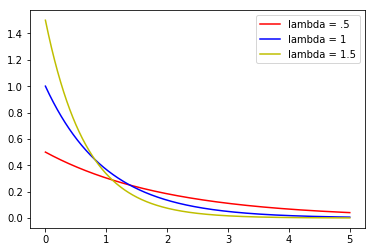

In [21]:
def exponential_pdf(lbda, x):
    return lbda * np.exp(-lbda * x)

x = np.linspace(0, 5, 1000)

plt.plot(x, exponential_pdf(.5, x), c='r', label='lambda = .5')
plt.plot(x, exponential_pdf(1, x), c='b', label='lambda = 1')
plt.plot(x, exponential_pdf(1.5, x), c='y', label='lambda = 1.5')
plt.legend()
plt.show()

# Laplace Distribution

$$X \sim \text{Laplace}(\mu;\gamma)$$

X is a continous variabe with a shark peak at $\mu$

Parameters:
- $\mu \in \mathbb{R}$: mean
- $\gamma \in \mathbb{R}$, $\gamma > 0$: scale

$$\text{PDF: } f(x) = \frac{1}{2 \gamma} \exp(-\frac{|x - \mu|}{\gamma})$$
$$\mathbb{E}[X] = \mu$$
$$\text{Var}(X) = 2\gamma^2$$

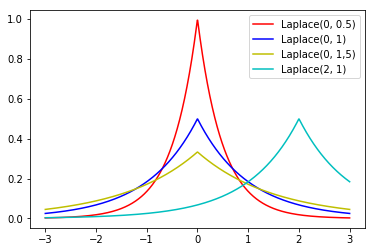

In [23]:
def laplace_pdf(mu, b, x):
    den = 2 * b
    num = - np.abs(x - mu) / b
    return np.exp(num) / den

x = np.linspace(-3, 3, 1000)

plt.plot(x, laplace_pdf(0, 0.5, x), c='r', label='Laplace(0, 0.5)')
plt.plot(x, laplace_pdf(0, 1, x), c='b', label='Laplace(0, 1)')
plt.plot(x, laplace_pdf(0, 1.5, x), c='y', label='Laplace(0, 1,5)')
plt.plot(x, laplace_pdf(2, 1, x), c='c', label='Laplace(2, 1)')
plt.legend()
plt.show()

# Dirac Distribution

$X$ is a continous variable with a infitenely high peak at $\mu$, and $0$ everywhere.

Parameters:
- $\mu \in \mathbb{R}$: mean

$$\text{PDF}: f(x) = \delta(x - \mu)$$

with $\delta(x)$ the Dirac delta function, a function that is zero-valued everywhere except at $0$, and yet integrates to $1$.

# Empirical distribution

X define an empirical distribution of size $m$ (eg: dataset) over countinous variables

Parameters:
- datset $\{ x_1, \text{...}, x_m \}$

$$\text{PDF} f(x) = \frac{1}{m} \sum_{i=1}^m \delta(x - x_i)$$

The empirical distribution is the distribution when we sample data from a dataset.  
This is the probability density that maximizes the likelihood of the training data.

# Beta distribution

$$X \sim \text{Beta}(\alpha, \beta)$$

Parameters:
- $\alpha \in \mathbb{R} > 0$
- $\beta \in \mathbb{R} > 0$

The parameter $x \in \mathbb{R}$ must bet in $[0,1]$

$$\text{PDF: } f(x) = \frac{x^{\alpha-1} (1-x)^{\beta - 1}}{B(\alpha,\beta)}$$

$$\text{where } B(\alpha,\beta) = \frac{\Gamma (\alpha) \Gamma(\beta)}{\Gamma (\alpha + \beta)}$$

$$\text{where } \Gamma(z) = \int_{0}^{+\infty} x^{z-1} e^{-x}dx$$  

$$E[X] = \frac{\alpha}{\alpha + \beta}$$
$$\text{Var}(X) = \frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$$

The beta distribution is the conjugate prior probability distribution of the bernoulli, bonomial, and geometric distributions.  
It is usually used to describe prior knowledge concerning the probability of success of an event.

# Dirichlet distribution

$$X \sim \text{Dir}(\alpha)$$

Parameters:
$\alpha \in \mathbb{R}^K$, $K \geq 2$, $\alpha_k > 0$

Input: $x \in \mathbb{R}^K$, with $x_k \in [0,1]$, and $\sum_{k=1}^Kx_k=1$

$$\text{PDF: } \frac{1}{B(\alpha)} \prod_{i=1}^K x_i^{\alpha_i-1}$$

$$\text{where } B(\alpha) = \frac{\prod_{i=1}^K \Gamma(\alpha_i)}{\Gamma(\sum_{i=1}^K\alpha_i)}$$

$$E[X_i] = \frac{\alpha_i}{\sum_{k=1}^K \alpha_k}$$
$$\text{Var}(X_i) = \frac{\alpha_i(\alpha_0 - \alpha_i)}{\alpha_0^2(\alpha_0 + 1)}$$
$$\text{where } \alpha_0 = \sum_{i=1}^K \alpha_i$$  

The dirichlet distribution is a multivariate generalization of the beta distribution.  
It's the conjugate prior probability distribution of the categorical and polynomial distribution.

# Mixture of distributions

A mixture distribution is made up of several components distributions.  
On each trial, the choice of which component distribution generates the sample is determined by a multinoulli distribution:

$$P(x) = \sum_i P(c=i) P(x|c=i)$$

with $P(c)$ the multinoulli distribution, and $P(x|c=i)$ the PDF of the $i$-th component distribution.

$c$ is a latent variable.  

A common type on mixture models is the Gaussian mixture, where each component is a multivariate normal distribution.  
Each component may have a separate $\mu^{(i)}$ and $\Sigma^{(i)}$, or they may have some constraints (eg sharing, special form of covariance).  
A gaussian mixture model is a universal approximator of disenties, given enough components.

In [50]:
def rand_gauss_mixture(means, stds, p):
    c = np.random.choice(len(p), p=p)
    x = np.random.randn() * stds[c] + means[c]
    return x
    
means = np.array([-1, 1, 1])
stds = np.array([0.8, 1.3, 1.1])
p = np.array([0.4, 0.35, 0.25])

N = 100000
x = np.array([rand_gauss_mixture(means, stds, p) for _ in range(N)])

print('mu =', np.mean(x), means @ p)
print('std =', np.std(x), stds @ np.sqrt(p * (1-p)))

mu = 0.20229981434366223 0.19999999999999996
std = 1.4511170876225081 1.4882928118477645
